<a href="https://www.kaggle.com/code/priyankamukulsharma/irisgridsearchcv?scriptVersionId=94222871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import GridSearchCV,learning_curve,validation_curve
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%config Completer.use_jedi = False


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset=pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

In [3]:
dataset.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
dataset.tail(50)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


# It shows data not shuffled in the dataset. There are two ways to shuffle the data. Either shuffle the data using Pandas or during Cross Validation

In [5]:
dataset=dataset.sample(frac=1,random_state=42)
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


# Creating Feature matrix and Target vector¶

In [10]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [11]:
y

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',


# Normalizing the parameters

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 3.10997534e-01, -5.87763531e-01,  5.35295827e-01,
         1.75297293e-03],
       [-1.73673948e-01,  1.72626612e+00, -1.17067529e+00,
        -1.18150376e+00],
       [ 2.24968346e+00, -1.05056946e+00,  1.78634131e+00,
         1.44795564e+00],
       [ 1.89829664e-01, -3.56360566e-01,  4.21564419e-01,
         3.96171883e-01],
       [ 1.15917263e+00, -5.87763531e-01,  5.92161531e-01,
         2.64698913e-01],
       [-5.37177559e-01,  8.00654259e-01, -1.28440670e+00,
        -1.05003079e+00],
       [-2.94841818e-01, -3.56360566e-01, -9.02269170e-02,
         1.33225943e-01],
       [ 1.28034050e+00,  1.06445364e-01,  7.62758643e-01,
         1.44795564e+00],
       [ 4.32165405e-01, -1.97618132e+00,  4.21564419e-01,
         3.96171883e-01],
       [-5.25060772e-02, -8.19166497e-01,  8.03701950e-02,
         1.75297293e-03],
       [ 7.95669016e-01,  3.37848329e-01,  7.62758643e-01,
         1.05353673e+00],
       [-1.26418478e+00, -1.24957601e-01, -1.34127240e+00,
      

# Trying different models with Grid Search CV

# 1. Logistic Regression- Tuning the C parameter

In [14]:
c=np.linspace(0.1,100,10)
param_grid={"C":c}

In [15]:
lr=LogisticRegression(max_iter=1000)
grid=GridSearchCV(lr,cv=10,param_grid=param_grid) #using the default scorer
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7,  77.8,  88.9,
       100. ])})

In [16]:
print(grid.best_estimator_),grid.best_score_

LogisticRegression(C=22.300000000000004, max_iter=1000)


(None, 0.9600000000000002)

In [17]:
joblib.dump(grid.best_estimator_,'./LR_model.pkl')

['./LR_model.pkl']

In [18]:
aa=joblib.load('./LR_model.pkl')


# We can get the complete GridSearch result with cv_results_ parameter.

In [19]:
data=pd.DataFrame(data=grid.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005798,0.001985,0.000378,0.000087,0.1,{'C': 0.1},1.0,0.933333,0.733333,1.0,1.0,0.733333,1.000000,0.933333,0.933333,0.933333,0.920000,0.097980,10
1,0.009567,0.000760,0.000361,0.000025,11.2,{'C': 11.200000000000001},1.0,1.000000,0.933333,1.0,1.0,0.733333,0.866667,1.000000,1.000000,1.000000,0.953333,0.084591,9
2,0.011197,0.001179,0.000364,0.000041,22.3,{'C': 22.300000000000004},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
3,0.010924,0.001113,0.000352,0.000028,33.4,{'C': 33.400000000000006},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
4,0.011386,0.000683,0.000360,0.000019,44.5,{'C': 44.50000000000001},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
5,0.011580,0.001155,0.000359,0.000016,55.6,{'C': 55.60000000000001},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
6,0.011653,0.001109,0.000363,0.000013,66.7,{'C': 66.7},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
7,0.012516,0.003410,0.000372,0.000019,77.8,{'C': 77.80000000000001},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
8,0.011739,0.001217,0.000380,0.000022,88.9,{'C': 88.9},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1
9,0.013365,0.001499,0.000401,0.000021,100.0,{'C': 100.0},1.0,1.000000,0.933333,1.0,1.0,0.800000,0.866667,1.000000,1.000000,1.000000,0.960000,0.067987,1


# **2. KNN with tuning hyperparameter n_neighbors**

In [20]:
knn=KNeighborsClassifier()
n=[1,2,3,4,5,6,7,8,9,10,11,12]
n??

In [21]:
grid1=GridSearchCV(knn,param_grid={'n_neighbors':n},cv=10)
grid1.fit(X,y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12]})

In [22]:
grid1.best_estimator_,grid1.best_params_,grid1.best_score_

(KNeighborsClassifier(n_neighbors=7), {'n_neighbors': 7}, 0.9600000000000002)

In [23]:
joblib.dump(grid1.best_estimator_,'./KNN_model.pkl')

['./KNN_model.pkl']

In [24]:
joblib.load('KNN_model.pkl')

KNeighborsClassifier(n_neighbors=7)

In [25]:
data=pd.DataFrame(data=grid1.cv_results_)

In [26]:
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000655,0.000074,0.001167,0.000065,1,{'n_neighbors': 1},0.933333,1.0,0.933333,1.0,1.000000,0.800000,0.866667,1.0,1.0,0.933333,0.946667,0.065320,10
1,0.000626,0.000018,0.001150,0.000074,2,{'n_neighbors': 2},1.000000,1.0,0.933333,1.0,1.000000,0.800000,0.866667,1.0,1.0,0.933333,0.953333,0.066999,2
2,0.000608,0.000016,0.001133,0.000020,3,{'n_neighbors': 3},1.000000,1.0,0.933333,1.0,1.000000,0.800000,0.866667,1.0,1.0,0.933333,0.953333,0.066999,2
3,0.000625,0.000012,0.001163,0.000064,4,{'n_neighbors': 4},1.000000,1.0,0.933333,1.0,0.933333,0.800000,0.866667,1.0,1.0,0.866667,0.940000,0.069602,12
4,0.000627,0.000024,0.001470,0.000946,5,{'n_neighbors': 5},1.000000,1.0,0.933333,1.0,1.000000,0.733333,0.866667,1.0,1.0,0.933333,0.946667,0.083267,10
5,0.000612,0.000015,0.001144,0.000015,6,{'n_neighbors': 6},1.000000,1.0,0.933333,1.0,0.933333,0.866667,0.866667,1.0,1.0,0.933333,0.953333,0.052068,2
6,0.000621,0.000021,0.001174,0.000059,7,{'n_neighbors': 7},1.000000,1.0,0.933333,1.0,0.933333,0.933333,0.866667,1.0,1.0,0.933333,0.960000,0.044222,1
7,0.000608,0.000016,0.001159,0.000042,8,{'n_neighbors': 8},1.000000,1.0,0.933333,1.0,0.933333,0.933333,0.866667,1.0,1.0,0.866667,0.953333,0.052068,2
8,0.000612,0.000018,0.001168,0.000061,9,{'n_neighbors': 9},1.000000,1.0,0.933333,1.0,0.933333,0.933333,0.866667,1.0,1.0,0.866667,0.953333,0.052068,2
9,0.000616,0.000029,0.001155,0.000024,10,{'n_neighbors': 10},1.000000,1.0,0.933333,1.0,0.933333,0.933333,0.866667,1.0,1.0,0.866667,0.953333,0.052068,2


# 3. SVC with tuning hyperparameters 'C','gamma','kernel'

In [27]:
svc=SVC()
param_grid={'C':[0.1,1,10,100,1000],
             'gamma':[.0001,.001,.01,.1,1],
           'kernel':['rbf']}
grid2=GridSearchCV(svc,param_grid,cv=10)
grid2.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [28]:
grid2.best_score_



0.9666666666666668

In [29]:
data=pd.DataFrame(data=grid2.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001671,0.000077,0.000460,0.000035,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",1.000000,0.866667,...,0.933333,0.800000,0.733333,0.933333,0.933333,0.933333,0.800000,0.853333,0.114698,21
1,0.001633,0.000020,0.000447,0.000013,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",1.000000,0.866667,...,0.933333,0.800000,0.733333,0.933333,0.933333,0.933333,0.800000,0.853333,0.114698,21
2,0.001658,0.000070,0.000459,0.000013,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",1.000000,0.866667,...,1.000000,0.800000,0.733333,0.933333,0.933333,0.933333,0.800000,0.860000,0.120922,20
3,0.001290,0.000012,0.000431,0.000009,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.933333,...,1.000000,0.800000,0.733333,1.000000,0.933333,0.933333,0.866667,0.900000,0.090676,18
4,0.001436,0.000028,0.000433,0.000008,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",1.000000,1.000000,...,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.933333,0.078881,11
5,0.001629,0.000011,0.000454,0.000007,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",1.000000,0.866667,...,0.933333,0.800000,0.733333,0.933333,0.933333,0.933333,0.800000,0.853333,0.114698,21
6,0.001621,0.000005,0.000455,0.000005,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",1.000000,0.866667,...,0.933333,0.800000,0.733333,0.933333,0.933333,0.933333,0.800000,0.853333,0.114698,21
7,0.001180,0.000052,0.000430,0.000023,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",1.000000,0.933333,...,1.000000,0.800000,0.800000,1.000000,0.933333,0.933333,0.800000,0.900000,0.085635,18
8,0.000922,0.000013,0.000380,0.000011,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,1.000000,...,1.000000,0.933333,0.866667,0.866667,1.000000,1.000000,0.933333,0.953333,0.052068,2
9,0.001195,0.000034,0.000373,0.000005,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",1.000000,1.000000,...,1.000000,1.000000,0.733333,0.866667,1.000000,0.933333,0.933333,0.940000,0.081377,9


In [30]:
grid2.best_estimator_,grid2.best_params_,grid2.best_score_

(SVC(C=1000, gamma=0.001),
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'},
 0.9666666666666668)

In [31]:
joblib.dump(grid2.best_estimator_,'./SVC.pkl')

['./SVC.pkl']

#  4. Decision Tree with hyperpameter tuning max_depth and criterion

In [32]:
DTC=DecisionTreeClassifier()
param_grid={"max_depth" : [1,3,5,7,9,11,12],
           "criterion":['gini','entropy']
           }
grid3=GridSearchCV(DTC,param_grid,cv=10)
grid3.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [33]:
grid3.best_estimator_,grid3.best_params_,grid3.best_score_

(DecisionTreeClassifier(criterion='entropy', max_depth=3),
 {'criterion': 'entropy', 'max_depth': 3},
 0.9533333333333334)

In [34]:
joblib.dump(grid3.best_estimator_,'./DTC_model.pickle')

['./DTC_model.pickle']

In [35]:
data=pd.DataFrame(data=grid3.cv_results_)

In [36]:
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000632,0.000193,0.000297,0.000071,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,1.110223e-16,13
1,0.000588,0.000020,0.000274,0.000012,gini,3,"{'criterion': 'gini', 'max_depth': 3}",1.000000,1.000000,0.933333,1.000000,0.933333,0.800000,0.866667,1.000000,1.000000,0.933333,0.946667,6.531973e-02,2
2,0.000629,0.000069,0.000275,0.000019,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.000000,1.000000,0.933333,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.933333,7.888106e-02,6
3,0.000593,0.000017,0.000275,0.000013,gini,7,"{'criterion': 'gini', 'max_depth': 7}",1.000000,1.000000,1.000000,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.940000,8.137704e-02,3
4,0.000629,0.000044,0.000290,0.000044,gini,9,"{'criterion': 'gini', 'max_depth': 9}",1.000000,1.000000,0.933333,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.933333,7.888106e-02,6
5,0.000610,0.000011,0.000279,0.000012,gini,11,"{'criterion': 'gini', 'max_depth': 11}",1.000000,1.000000,1.000000,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.940000,8.137704e-02,3
6,0.000602,0.000012,0.000272,0.000012,gini,12,"{'criterion': 'gini', 'max_depth': 12}",1.000000,1.000000,1.000000,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.940000,8.137704e-02,3
7,0.000557,0.000013,0.000268,0.000011,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,1.110223e-16,13
8,0.000599,0.000013,0.000275,0.000013,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",1.000000,1.000000,1.000000,1.000000,0.933333,0.800000,0.866667,1.000000,1.000000,0.933333,0.953333,6.699917e-02,1
9,0.000624,0.000026,0.000282,0.000024,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",1.000000,1.000000,0.933333,1.000000,0.933333,0.733333,0.866667,1.000000,0.933333,0.933333,0.933333,7.888106e-02,6


# **5. Random Forest Classifier with hypertuning n_estimators,max_depth**

In [37]:
RFC=RandomForestClassifier(n_jobs=-1)
param_grid={'n_estimators':[10,20,30,40,50],
           'max_depth':[3,4,5,6,7]
           }
grid4=GridSearchCV(RFC,param_grid,cv=10)
grid4.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [38]:
grid4.best_estimator_,grid4.best_params_,grid4.best_score_

(RandomForestClassifier(max_depth=3, n_estimators=10, n_jobs=-1),
 {'max_depth': 3, 'n_estimators': 10},
 0.9600000000000002)

In [39]:
joblib.dump(grid4.best_estimator_,'./RFC_model.pkl')

['./RFC_model.pkl']

In [40]:
#y
le=LabelEncoder()
y_encoded=le.fit_transform(y)
y_encoded

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

# 6. XGBoost with hyper tuning max_depth,n_estimators,learning rate

In [41]:
 
XGC=XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
param_grid = {
    'max_depth': [2,4,6],
    'n_estimators': [3,5,6],
    'learning_rate': [0.1, 0.01]
}
grid5=GridSearchCV(XGC,param_grid,cv=10,verbose=1)
grid5.fit(X,y_encoded)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
        

In [42]:
grid5.best_estimator_,grid5.best_params_,grid5.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=4, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=3, n_jobs=4,
               num_parallel_tree=1, objective='multi:softprob', predictor='auto',
               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
               subsample=1, tree_method='exact', use_label_encoder=False,
               validate_parameters=1, ...),
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 3},
 0.9666666666666668)

In [43]:
joblib.dump(grid5.best_estimator_,'./XGC_model.pkl')

['./XGC_model.pkl']

# **Plotting Validation curve for LogisticRegression**

In [44]:
# Plotting validation curve for LogisticRegression
param_range=[1,2,3,4,5,10,15,20,25,30,35,40,45,50]
train_score,test_score=validation_curve(svc,X,y,param_name="C",param_range=param_range,cv=5)

In [45]:
test_mean=np.mean(test_score,axis=1)
train_mean=np.mean(train_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

In [46]:
test_mean,test_std,train_mean,train_std

(array([0.96      , 0.94666667, 0.94666667, 0.94666667, 0.95333333,
        0.95333333, 0.94666667, 0.94666667, 0.94666667, 0.94666667,
        0.94666667, 0.94666667, 0.94666667, 0.94666667]),
 array([0.02494438, 0.04521553, 0.04521553, 0.04521553, 0.04988877,
        0.04988877, 0.04521553, 0.04521553, 0.04521553, 0.04521553,
        0.04521553, 0.04521553, 0.04521553, 0.04521553]),
 array([0.97833333, 0.98      , 0.97833333, 0.97833333, 0.97833333,
        0.98333333, 0.985     , 0.985     , 0.98666667, 0.98833333,
        0.98833333, 0.98833333, 0.98666667, 0.99      ]),
 array([0.00849837, 0.00666667, 0.00849837, 0.00849837, 0.00849837,
        0.00527046, 0.00333333, 0.00333333, 0.00408248, 0.00408248,
        0.00408248, 0.00408248, 0.00408248, 0.0062361 ]))

(0.1, 50.0)

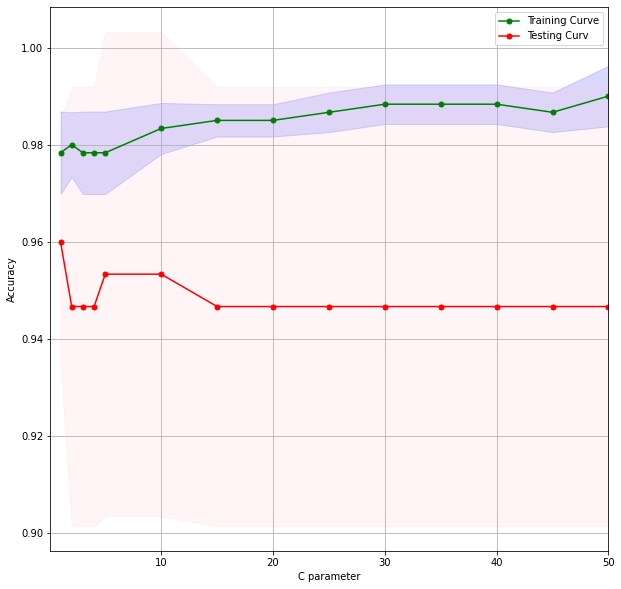

In [47]:
plt.figure(figsize=(10,10))
plt.plot(param_range,train_mean,color='green',marker='o',markersize=5,label='Training Curve')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,color='blue',alpha=0.15)
plt.plot(param_range,test_mean,color='red',marker='o',markersize=5,label='Testing Curv')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,color='pink',alpha=0.15)
plt.grid()
plt.legend()
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.xlim([0.1,50])




# Seems there is overfitting

# **Changing the gamma parameter**

In [48]:


param_range=np.logspace(-1, -2, 10)
train_score,test_score=validation_curve(svc,X,y,param_name="gamma",param_range=param_range,cv=5)
test_mean=np.mean(test_score,axis=1)
train_mean=np.mean(train_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)
test_mean,test_std,train_mean,train_std

(array([0.95333333, 0.94666667, 0.94666667, 0.95333333, 0.96      ,
        0.96      , 0.94666667, 0.92      , 0.91333333, 0.89333333]),
 array([0.04521553, 0.02666667, 0.04521553, 0.04521553, 0.04898979,
        0.04898979, 0.04521553, 0.07774603, 0.0718022 , 0.06463573]),
 array([0.97166667, 0.96833333, 0.96666667, 0.965     , 0.96166667,
        0.95833333, 0.94833333, 0.94      , 0.91333333, 0.89833333]),
 array([0.01      , 0.01224745, 0.00912871, 0.00971825, 0.01130388,
        0.01290994, 0.00971825, 0.01433721, 0.01130388, 0.00971825]))

In [49]:
param_range

array([0.1       , 0.07742637, 0.05994843, 0.04641589, 0.03593814,
       0.02782559, 0.02154435, 0.01668101, 0.0129155 , 0.01      ])

Text(0, 0.5, 'Accuracy')

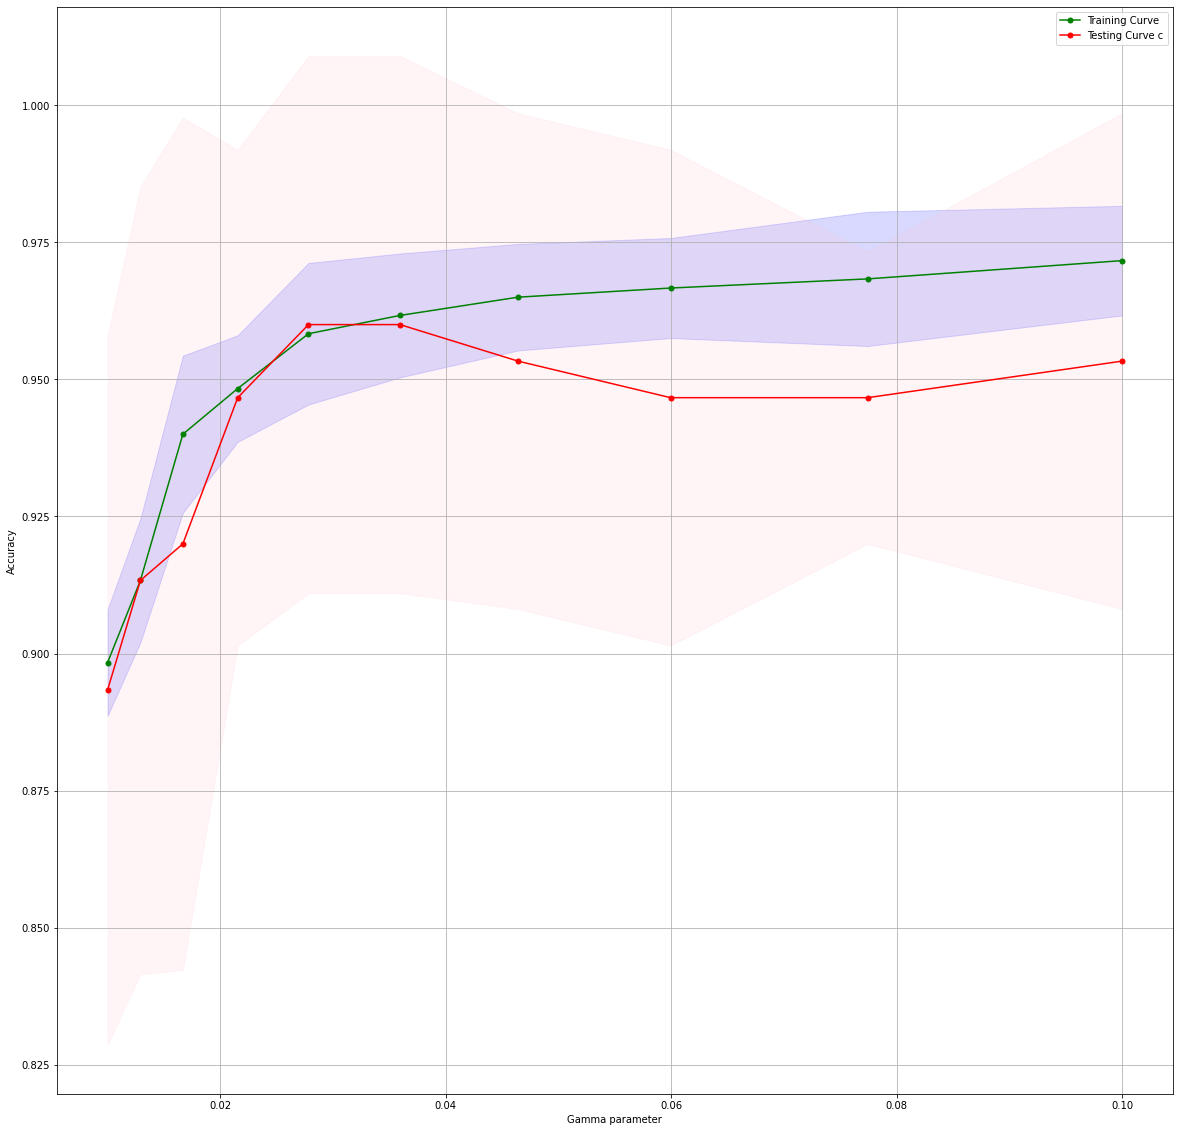

In [50]:
plt.figure(figsize=(20,20))
plt.plot(param_range,train_mean,color='green',marker='o',markersize=5,label='Training Curve')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,color='blue',alpha=0.15)
plt.plot(param_range,test_mean,color='red',marker='o',markersize=5,label='Testing Curve c')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,color='pink',alpha=0.15)
plt.grid()
plt.legend()
plt.xlabel('Gamma parameter')
plt.ylabel('Accuracy')
#plt.xlim([0.1,10])


# Plotting the learning curve for Logistic Regression

In [51]:
#plotting the learning curve

train_sizes,train_scores,test_scores=learning_curve(lr,X,y,cv=5,scoring='accuracy',train_sizes=[50,70,100,110,120])

In [52]:
train_sizes

array([ 50,  70, 100, 110, 120])

In [53]:
train_scores

array([[0.98      , 1.        , 0.98      , 0.98      , 0.98      ],
       [0.97142857, 0.94285714, 0.98571429, 0.98571429, 0.98571429],
       [0.97      , 0.97      , 0.99      , 0.98      , 0.97      ],
       [0.97272727, 0.97272727, 0.99090909, 0.98181818, 0.95454545],
       [0.96666667, 0.95833333, 0.98333333, 0.975     , 0.95833333]])

In [54]:
test_scores

array([[1.        , 0.96666667, 0.86666667, 1.        , 0.96666667],
       [0.96666667, 0.96666667, 0.86666667, 1.        , 0.96666667],
       [1.        , 0.96666667, 0.9       , 0.96666667, 0.96666667],
       [1.        , 0.96666667, 0.86666667, 0.96666667, 0.96666667],
       [1.        , 0.96666667, 0.86666667, 0.96666667, 0.96666667]])

In [55]:
test_mean=np.mean(test_scores,axis=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(test_scores,axis=1)

In [56]:
train_mean

array([0.984     , 0.97428571, 0.976     , 0.97454545, 0.96833333])

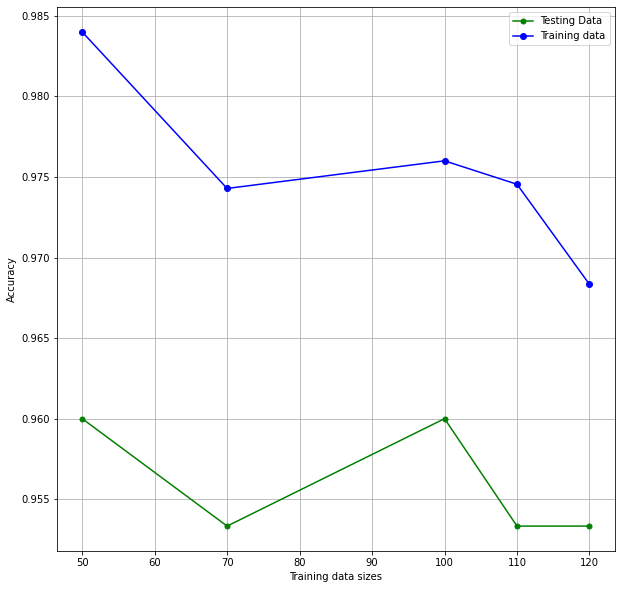

In [57]:
plt.figure(figsize=(10,10))
plt.plot(train_sizes,test_mean,label='Testing Data',marker='o',markersize='5',color='green')
plt.plot(train_sizes,train_mean,label='Training data',marker='o',markersize='6',color='blue')
plt.legend()
plt.xlabel("Training data sizes")
plt.ylabel("Accuracy")
plt.grid()
